# In this notebook we will learn about Convolutional Neural Networks using MNIST dataset.



In [1]:
# MACHINE LEARNING ON IMAGES


In [2]:
# Importing Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# loading MNIST

from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
# downloading data

In [5]:
(X_train ,y_train) , (X_test, y_test) = mnist.load_data('mnist.npz')

In [6]:
X_train.shape  # MNIST has 60,000 images in its training set and each image has 28 * 28 pixels.

(60000, 28, 28)

In [7]:
X_test.shape  # MNIST has 10,000 images in its test set and each image has 28 * 28 pixels.

(10000, 28, 28)

In [8]:
X_train[0]   # this series of numbers indicate a single image as shown below.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

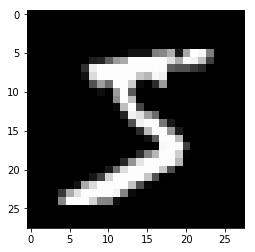

In [9]:
# displaying image

plt.imshow(X_train[0] , cmap ='gray')

To understand this better, think about training a network to recognize and classify handwritten digits from images. The network would have ten output units, one for each digit 0 to 9. Then if you fed it an image of a number 5 (seen above), the output unit corresponding to the digit 5 would be activated.

In [10]:
# Reshaping data so our data is a 2D object
X_train = X_train.reshape(-1 , 28*28)
X_test = X_test.reshape(-1, 28*28)

In [11]:
X_train.shape # converted from 3D to 2D

(60000, 784)

In [12]:
# convert data from integer to float ( we need numbers between 0 and 1 ) and scaling along.

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
X_train /= 255.0
X_test /= 255.0

In [14]:
from keras.utils.np_utils import to_categorical

In [15]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [16]:
y_train[0]

5

In [17]:
y_train_cat[0]  # it is non zero at 5's place and hence the above result

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
y_train_cat.shape

(60000, 10)

In [19]:
y_test_cat.shape

(10000, 10)

In [20]:
# CREATING A FULLY CONNECTED MODEL

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K



In [21]:
K.clear_session()
model = Sequential()
model.add(Dense(512 , input_dim= 28*28, activation ='relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(128, activation ='relu'))
model.add(Dense(32,activation ='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])

In [22]:
h = model.fit(X_train,y_train_cat,batch_size =128,epochs = 10,verbose =1,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 7s 170us/step - loss: 0.3389 - acc: 0.8972 - val_loss: 0.2136 - val_acc: 0.9311
Epoch 2/10
42000/42000 [==============================] - 8s 188us/step - loss: 0.1112 - acc: 0.9660 - val_loss: 0.1219 - val_acc: 0.9663
Epoch 3/10
42000/42000 [==============================] - 7s 170us/step - loss: 0.0721 - acc: 0.9777 - val_loss: 0.1125 - val_acc: 0.9677
Epoch 4/10
42000/42000 [==============================] - 8s 184us/step - loss: 0.0524 - acc: 0.9837 - val_loss: 0.1929 - val_acc: 0.9497
Epoch 5/10
42000/42000 [==============================] - 8s 187us/step - loss: 0.0401 - acc: 0.9874 - val_loss: 0.1223 - val_acc: 0.9718
Epoch 6/10
42000/42000 [==============================] - 8s 197us/step - loss: 0.0302 - acc: 0.9912 - val_loss: 0.1107 - val_acc: 0.9737
Epoch 7/10
42000/42000 [==============================] - 9s 212us/step - loss: 0.0235 - acc: 0.9930 - val_loss: 0.1223 - 

Text(0.5,0,'Epochs')

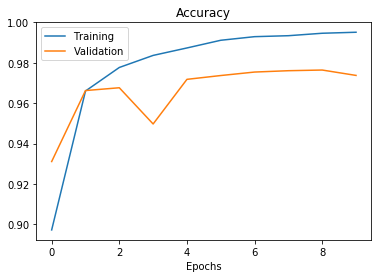

In [23]:
# we see that the model is overfitting since training accuracy is more than validation accuracy 


plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training','Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')


In [24]:
test_accuracy = model.evaluate(X_test,y_test_cat)[1]
test_accuracy

10000/10000 [==============================] - 1s 86us/step


0.9786